在开始之前，使用 iPython 笔记本时有几点需要注意一下：

- 如果代码单元格被运行之后，在单元格的左侧方框中会有数字出现。
- 当你启动一个新的笔记本会话时，请确保运行所有单元格（从第1个到你上次离开的单元格）。即使笔记本中依然可以看到上次运行所得到的输出，你重新运行的笔记本内核却处于一个完全新的状态，所以你需要重载数据和运行代码。
- 上一条注意事项特别重要。当你的答案和课程中的练习不一致时，请试着重载数据并一个一个运行代码单元格，以确保你所操作的变量和数据和练习中的一致。


## 从 CSV 加载数据

In [1]:
import unicodecsv

## 长代码版本 (该版本与短代码版本功能一致)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
print enrollments[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [3]:
#####################################
def read_data(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
#####################################

## 从 daily_engagement.csv 和 project_submissions.csv 载入数据并存
## 储至下面的变量中，然后检查每张表的第1行。

daily_engagement = read_data('daily_engagement.csv')
project_submissions = read_data('project_submissions.csv')


In [4]:
print daily_engagement[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


In [5]:
print project_submissions[0]

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## 修正数据类型

In [6]:
from datetime import datetime as dt

# 将字符串格式的时间转为 Python datetime 类型的时间。
# 如果没有时间字符串传入，返回 None

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# 将可能是空字符串或字符串类型的数据转为 整型 或 None。

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# 清理 enrollments 表格中的数据类型

for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [7]:
# 清理 engagement 的数据类型
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [8]:
# 清理 submissions 的数据类型
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

注意：当我们在运行上方的单元格时，我们已经改变了数据变量中的内容。如果你试着在同一个会话多次运行这些单元格时，可能会出错。

## 探索数据

In [9]:
#####################################
row_num_of_enroment = len(enrollments)
unique_enrolled_students = set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
print row_num_of_enroment
print len(unique_enrolled_students)
print "*************"

row_num_of_daily_engagement = len(daily_engagement)
unique_engagement_students = set()
for engagement in daily_engagement:
    unique_engagement_students.add(engagement['acct'])

print row_num_of_daily_engagement
print len(unique_engagement_students)
print "*************"

row_num_of_project_submissions = len(project_submissions)
unique_project_submitters = set()
for submission in project_submissions:
    unique_project_submitters.add(submission['account_key'])

print row_num_of_project_submissions
print len(unique_project_submitters)

#####################################

## 计算每张表中的总行数，和独立学生（拥有独立的 account keys）的数量


1640
1302
*************
136240
1237
*************
3642
743


## 数据中的问题

In [10]:
#####################################
print daily_engagement[0]
print daily_engagement[1]
print "*****************"

for engagement in daily_engagement:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']
    
print daily_engagement[0]
print daily_engagement[1]

print daily_engagement[0]['account_key']
#####################################

## 将 daily_engagement 表中的 "acct" 重命名为 ”account_key"


{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
*****************
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 37.2848873333, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
0


## 缺失的互动（Engagement）记录

In [11]:
#####################################

print len(enrollments)

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

#####################################

## 找到任意一个 enrollments 中的学生，但不在 daily engagement 表中。
## 打印出这条 enrollments 记录。


1640
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## 检查更多的问题记录

In [12]:
#####################################
i = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students\
            and enrollment['join_date'] != enrollment['cancel_date']:
        print enrollment
        i += 1

print i


#####################################

## 计算与众不同的数据点条数（在 enrollments 中存在，但在 engagement 表中缺失）


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## 追踪剩余的问题

In [13]:
# 为所有 Udacity 测试帐号建立一组 set 
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity'] :
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)



6

In [14]:
# 通过 account_key 删除所有 Udacity 的测试帐号
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [15]:
# 从3张表中移除所有 Udacity 的测试帐号
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## 重新定义问题

In [16]:
#####################################
paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
#        paid_students[account_key] = enrollment_date
        #  只存取最近的一次时间
        if account_key not in paid_students or\
                 enrollment_date > paid_students[account_key]:
                paid_students[account_key] =  enrollment_date
#    if account_key not in paid_students or\
#        enrollment_date > paid_students[account_key]:
#            paid_students[key] = enrollment_date

print len(paid_students)
#####################################

## 创建一个叫 paid_students 的字典，并在字典中存储所有还没有取消或者注册时间超过7天的学生。
## 字典的键为帐号（account key），值为学生注册的时间。
#print paid_students


995


## 获取第1周的数据
获取第1周的数据

In [17]:
# 基于学生的加入日期和特定一天的互动记录，若该互动记录发生在学生加入1周内，则反回 True

def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [30]:
#####################################
#paid_engagement_in_first_week = []

#print non_udacity_enrollments[0]
#length_enrollments = len(non_udacity_enrollments)

#使用paided student的account number.
#for account_key in paid_students:
#    for engagement in non_udacity_engagement:
#        if engagement['account_key'] == account_key:
#            if within_one_week(paid_students[account_key],engagement['utc_date']):
#                paid_engagement_in_first_week.append(engagement)
                
#for engagement in  non_udacity_enrollments:
#    if within_one_week(engagement['join_date'],engagement['engagement_date']):
#        paid_engagement_in_first_week.append(engagement)
def remove_free_trial_cancels(data):
    new_data=[]
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print len(paid_engagement_in_first_week)
#####################################

## 创建一个 engagement 记录的列表，该列表只包括付费学生以及加入的前7天的学生的记录
## 输入符合要求的行数

#paid_engagement_in_first_week = 

1293
134549
3618
6919
6919


## Exploring Student Engagement

In [19]:
from collections import defaultdict

# 创建基于 student 对 engagement 进行分组的字典，字典的键为帐号（account key），值为包含互动记录的列表
def group_data(data,key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
print engagement_by_account['108']


[{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 25.9137858334, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 20, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 3.40682316667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 21, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 99.1186611667, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 22, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 35.8316206667, u'projects_completed': 2, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 23, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'108', u'utc_date': datetime.datetime(2015, 4, 24, 0, 0)}, {u'lessons_completed': 0, u'num_co

In [20]:
# 创建一个包含学生在第1周在教室所花总时间和字典。键为帐号（account key），值为数字（所花总时间）
def sum_grouped_items(grouped_data,field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    
    return summed_data
total_minutes_by_account = sum_grouped_items(engagement_by_account,'total_minutes_visited')

# print total_minutes_by_account['447']

In [21]:
import numpy as np

# 汇总和描述关于教室所花时间的数据
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## 纠错现有的数据分析代码

In [22]:
#####################################
student_with_max_minutes = None
max_minutes = 0

for student,total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print max_minutes

#for account_key in total_minutes_by_account:
#    if total_minutes_by_account[account_key] > 7*24*60:
#        print account_key ,total_minutes_by_account[account_key]
#
#for engagement in paid_engagement_in_first_week:
#    if engagement['account_key'] == '108':
#        print engagement
            

##########################################################################
#####################################


## 通过之前的方法检查是否有问题数据存在。
## 定位至少一条异常数据，打印出来并检查。

3564.7332645


In [23]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## 第1周完成的课程数（Lessons）

In [24]:
# 创建一个包含学生在第1周在教室所完成课程的字典。键为帐号（account key），值为数字（所完成的总课程）

class_by_account =  group_data(paid_engagement_in_first_week,'account_key')
total_class_by_account = sum_grouped_items(class_by_account,'lessons_completed')

# 找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。
## 修改之前的代码，找出第1周学生完成课程数的 平均值、标准差、最小值、最大值。尝试创建一个或更多的函数来复用之前的代码

total_classes = total_class_by_account.values()
describe_data(total_classes)


Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## 第1周的访问次数

In [25]:
######################################
# print engagement_by_account['9']

def group_data_new(data,key_name):
    grouped_data_new = defaultdict(list)
    
    #添加一列has_visited属性
    for engagement in data:
        if engagement['total_minutes_visited'] > 0 :
            engagement['has_visited'] = 1
        else:
            engagement['has_visited'] = 0
    
    for data_point in data:
        key = data_point[key_name]
        grouped_data_new[key].append(data_point)
    return grouped_data_new

engagement_by_account_new = group_data_new(paid_engagement_in_first_week,'account_key')
# print engagement_by_account_new['17']

total_day_by_account = sum_grouped_items(engagement_by_account_new,'has_visited')

describe_data(total_day_by_account.values())

## 找出第1周学生访问教室天数的平均值、标准差、最小值、最大值。

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## 区分项目通过的学生

In [37]:
######################################
#第一周学生的account_key.
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project = set()

for submission in paid_submissions:
    if((submission['lesson_key'] in subway_project_lesson_keys) and
        (submission['assigned_rating'] == 'PASSED' or  submission['assigned_rating'] =='DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)




#passing_engagement = []
#non_passing_engagement =[]

#for keys in engagement_by_account.keys():
#for project_submission in paid_submissions :
#    if within_one_week(project_submission['creation_date'],project_submission['completion_date']):
#    if (project_submission['lesson_key'] == '746169184' or project_submission['lesson_key'] == '3176718735') :
#        if (project_submission['assigned_rating'] == 'PASSED' or project_submission['assigned_rating'] == 'DISTINCTION') :
#            passing_engagement.append(project_submission)
#        else:
#            non_passing_engagement.append(project_submission)


#print len(passing_engagement)
#print len(non_passing_engagement)



## 创建两个付费学生第1周的互动数据列表（engagement）。第1个包含通过项目的学生，第2个包含没通过项目的学生。



#passing_engagement =
#non_passing_engagement =

4527
2392


In [41]:
print paid_submissions[0]
print 'xxx'
print passing_engagement[0]
print 'xxx'
print non_passing_engagement[0]

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}
xxx
{u'lessons_completed': 0, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
xxx
{u'lessons_completed': 0, u'num_courses_visited': 0, 'has_visited': 0, u'total_minutes_visited': 0.0, u'projects_completed': 0, 'account_key': u'653', u'utc_date': datetime.datetime(2015, 7, 8, 0, 0)}


## 对比两组学生数据

In [42]:
######################################
passing_engagement_by_account = group_data(passing_engagement,
                                           'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                               'account_key')

print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

print 'passing students:'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

print 'passing students:'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())

print 'non-passing students:'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

print 'passing students:'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())
######################################

## 计算你所感兴趣的数据指标，并分析通过项目和没有通过项目的两组学生有何异同。
## 你可以从我们之前使用过的数据指标开始（教室的访问时间、课程完成数、访问天数）。


non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7
passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


## 制作直方图

Populating the interactive namespace from numpy and matplotlib
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


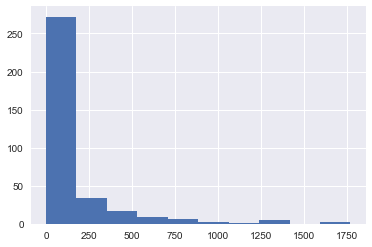

In [64]:
######################################
% pylab inline

import matplotlib.pyplot as plt
import numpy as np

# Summarize the given data
def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
######################################

describe_data(non_passing_minutes.values())

#describe_data(passing_minutes.values())

#describe_data(passing_lessons.values())
#describe_data(non_passing_visits.values())
## 针对通过项目和没有通过项目的两组学生，为我们之前研究的三个数据指标制作直方图。
## 你也可以为其它你所检验的数据指标来制作直方图。

## 改进图表及分享发现

Text(0.5,1,u'Distribution of classroom visits in the first week for students who pass the subway project')

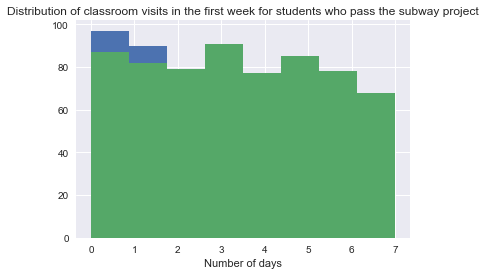

In [66]:
######################################
import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

#sns.set(color_codes=True)
######################################

## 至少改进一幅之前的可视化图表，尝试导入 seaborn 库使你的图表看起来更美观。
## 加入轴标签及表头，并修改一个或多个 hist() 内的变量。